<a href="https://colab.research.google.com/github/brillantescene/Capstone_Design/blob/master/dual_cnn_major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras #import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
import numpy as np
from tensorflow.keras import Model
from keras import optimizers


#from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint

import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os, shutil

keras.__version__

'2.3.0-tf'

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
learning_rate = 0.001
training_epochs = 100
batch_size = 4 #64
target_size=(150, 150)

In [0]:
original_dataset_dir = '/content/gdrive/My Drive/JOLJAACK2020/datasets/images'
base_dir = '/content/gdrive/My Drive/JOLJAACK2020/datasets/images_small'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
if os.path.exists(base_dir):  
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [0]:
# training용 디렉터리
train_vacuum_cleaner_dir = os.path.join(train_dir, 'vacuum_cleaner')
train_toilet_flush_dir = os.path.join(train_dir, 'toilet_flush')
train_door_knock_dir = os.path.join(train_dir, 'door_knock')
train_baby_crying_dir = os.path.join(train_dir, 'baby_crying')
train_clock_alarm_dir = os.path.join(train_dir, 'clock_alarm')

In [0]:
os.mkdir(train_vacuum_cleaner_dir)
os.mkdir(train_toilet_flush_dir)
os.mkdir(train_door_knock_dir)
os.mkdir(train_baby_crying_dir)
os.mkdir(train_clock_alarm_dir)

In [0]:
# validation용 디렉터리
validation_vacuum_cleaner_dir = os.path.join(validation_dir, 'vacuum_cleaner')
validation_toilet_flush_dir = os.path.join(validation_dir, 'toilet_flush')
validation_door_knock_dir = os.path.join(validation_dir, 'door_knock')
validation_baby_crying_dir = os.path.join(validation_dir, 'baby_crying')
validation_clock_alarm_dir = os.path.join(validation_dir, 'clock_alarm')

In [0]:
os.mkdir(validation_vacuum_cleaner_dir)
os.mkdir(validation_toilet_flush_dir)
os.mkdir(validation_door_knock_dir)
os.mkdir(validation_baby_crying_dir)
os.mkdir(validation_clock_alarm_dir)

In [0]:
# test용 디렉터리
test_vacuum_cleaner_dir = os.path.join(test_dir, 'vacuum_cleaner')
test_toilet_flush_dir = os.path.join(test_dir, 'toilet_flush')
test_door_knock_dir = os.path.join(test_dir, 'door_knock')
test_baby_crying_dir = os.path.join(test_dir, 'baby_crying')
test_clock_alarm_dir = os.path.join(test_dir, 'clock_alarm')

In [0]:
os.mkdir(test_vacuum_cleaner_dir)
os.mkdir(test_toilet_flush_dir)
os.mkdir(test_door_knock_dir)
os.mkdir(test_baby_crying_dir)
os.mkdir(test_clock_alarm_dir)

In [12]:
print('훈련용 vacuum_cleaner 이미지 전체 개수:', len(os.listdir(train_vacuum_cleaner_dir)))

훈련용 vacuum_cleaner 이미지 전체 개수: 20


In [0]:
##### conv 3, pooling 3
class AcousticSoundModel(tf.keras.Model):
    def __init__(self):
        super(AcousticSoundModel, self).__init__()
        self.conv1 = Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop1 = Dropout(rate=0.2)
        self.pool1 = MaxPool2D(padding='SAME') ###### pooling 2x2. stride는 표기 x, 확인 ######
        
        self.conv2 = Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop2 = Dropout(rate=0.2) #20% dropout
        self.pool2 = MaxPool2D(padding='SAME')
        
        self.conv3 = Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop3 = Dropout(rate=0.2) #20% dropout
        self.pool3 = MaxPool2D(padding='SAME')
        
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = Dense(units=128, activation=tf.nn.relu)
        self.dense5 = Dense(units=5, activation=tf.nn.sigmoid) ### 일단 5. class 개수 추가되는 대로 변경
        
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.drop1(net)
        net = self.pool1(net)
        
        net = self.conv2(net)
        net = self.drop2(net)
        net = self.pool2(net)
        
        net = self.conv3(net)
        net = self.drop3(net)
        net = self.pool3(net)
        
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.dense5(net) #
        return net #
        # return self.dense5(net)

In [0]:
model = AcousticSoundModel()

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=learning_rate),
              metrics=['acc'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, #target directory
        target_size=target_size, #150 150
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 100 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('batch data size:', data_batch.shape)
    print('batch label size:', labels_batch.shape)
    break

batch data size: (4, 150, 150, 3)
batch label size: (4, 5)


In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=25, # batch크기 4, 전체 200개 샘플이니까 25
      epochs=training_epochs,
      validation_data=validation_generator,
      validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
25/25 [==============================] - 74s 3s/step - loss: 1.7134 - acc: 0.2500 - val_loss: 1.5405 - val_acc: 0.5833
Epoch 2/100
25/25 [==============================] - 3s 129ms/step - loss: 1.5002 - acc: 0.3100 - val_loss: 1.4293 - val_acc: 0.3958
Epoch 3/100
25/25 [==============================] - 3s 129ms/step - loss: 1.2360 - acc: 0.4700 - val_loss: 1.1188 - val_acc: 0.6042
Epoch 4/100
25/25 [==============================] - 3s 129ms/step - loss: 1.1084 - acc: 0.4100 - val_loss: 1.0910 - val_acc: 0.5208
Epoch 5/100
25/25 [==============================] - 3s 128ms/step - loss: 0.9984 - acc: 0.6000 - val_loss: 0.9878 - val_acc: 0.8125
Epoch 6/100
25/25 [==============================] - 3s 128ms/step - loss: 0.8221 - acc: 0.6900 - val_loss: 1.0007 - val_acc: 0.7708
Epoch 7/100
25/25 [==============================] - 3s 130ms/step - loss: 0.7785 - acc: 0.7300 - val_loss: 0.7669 - val_acc: 0.

In [0]:
# 훈련 끝나면 호델 저장
model.save_weights('images_small_2', save_format='tf')

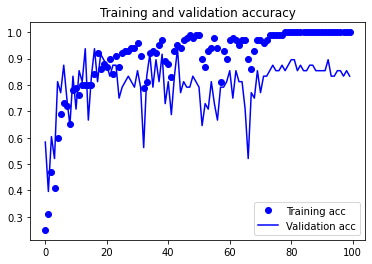

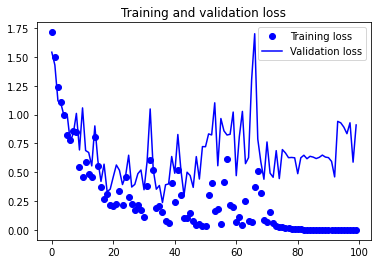

In [21]:
#훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()